У завданнях 1-4. Вам наданий простий код на Python, який не відповідає вказівкам PEP8. Ваше завдання — відредагувати код так, аби він відповідав PEP8. Напишіть після редагуванню коду, дотримання яких правил з pep8 ви досягли в відредагованій версі, наприклад
```
- додала пробіли навколо бінарного оператора
- додала два порожні рядки між визначеннями функцій
і тд
```
Також можна зазанчити використані правила коментарями по коду, а не окремим повідомленням.

Відредагований код має виконувати весь той самий функціонал, але бути написаний відповідно до вимог до гарного коду на Python! Не забудьте запустити відредагований код, він має бути робочим.

Завдання 1.

In [1]:
def greet(name):
    print(f"Hello, {name}")
    
    
def add(n1, n2):
    return n1 + n2

x = 5
y = 3

display(greet("John"), add(x, y))


Hello, John


None

8

In [2]:
- Додала два порожні рядки між визначеннями функцій
- Кожен окремий вираз перенесла в окремомий рядок замість кількох в одному рядку
- Після кожної коми поставила пробіл та забрали крапки з комою
- Додала пробіли навколо бінарного оператора

SyntaxError: invalid syntax (2457291353.py, line 1)

Завдання 2.

In [3]:
from math import pi


def calc_area(r):
    return pi * r ** 2


def calc_circumference(r):
    return 2 * pi * r


radius = 5
print("Area:", calc_area(radius), "Circumference:", calc_circumference(radius))

Area: 78.53981633974483 Circumference: 31.41592653589793


In [ ]:
- Додала два порожні рядки між визначеннями функцій
- Після кожної коми поставила пробіл 
- Додала пробіли навколо кожного оператора
- змінила назви ф-цій Назви функцій мають бути написані малими літерами, а слова розділені підкресленням, щоб покращити читабельність.
- iмпортували тільки потрібний модуль з бібліотеуи

Завдання 3.

In [4]:
class Animal: 
    pass


class Dog(Animal): 
    
    def __init__(self, name):
        self.name = name
        self.type = 'Dog'

In [ ]:
- Додала два порожні рядки між визначеннями класів
- Змінила назви класів з великої літери
- поставила пробіли навколо =, та після коми 

Завдання 4.

In [5]:
new_list = [1, 2, 3, 4, 5]

for i in new_list:
    print(i)

1
2
3
4
5


In [ ]:
- не можна використувати зарезервовану змінну list - тому ми перейменували
- кожен вираз перенесла в окремий рядок
- оскільки ми в циклі просто проходимось по елементам списку забрала зайву функцію довжини спику

5.У вас є DataFrame df, що представляє результати тестів студентів з математики, англійської мови та історії. Поточний код обчислює середній бал для кожного студента шляхом ітерації за рядками DataFrame за допомогою iterrows().

Ваше завдання полягає в тому, щоб змінити код так, аби уникнути використання iterrows() і замість цього застосувати більш ефективне та читабельне рішення відповідно до правил, озвучених у лекції. Рефакторинг треба зробити лише частині, де рахуються середні, імпорт і визначення датафрейму лишаємо без змін.

In [6]:
import pandas as pd

df = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie', 'David'],
    'math_score': [89, 94, 77, 85],
    'english_score': [92, 88, 79, 85],
    'history_score': [84, 92, 81, 89]
})

In [8]:
df['averages'] = df[['math_score', 'english_score', 'history_score']].mean(axis=1)
df['averages']

0    88.333333
1    91.333333
2    79.000000
3    86.333333
Name: averages, dtype: float64

In [ ]:
Щоб не писати цикл та за формулою рахувати середнє значення ми просто використовуємо метод mean() до кожного рядка (axis=1 - вказали що рахуємо по рядкам

6.У Вас є великий DataFrame df, що представляє транзакції продажу в магазині. Цей DataFrame містить понад 1 мільйон рядків і кілька стовпців, зокрема «product_name», «product_category», «product_price» і «transaction_date».

І «product_name», і «product_category» є рядками, що представляють численні, але обмежені унікальні назви продуктів і категорії відповідно.

Напишіть код для ефективного перетворення стовпців «product_name» і «product_category» на категорійний тип для ефективного використання пам’яті.
Спробуйте вирішити це завдання, мінімізуючи використання пам'яті та зберігаючи читабельність коду. Крім того, виміряйте використання пам’яті до та після перетворення, щоб продемонструвати підвищення ефективності.

Порівняйте кількість памʼяті, яку займає наданий набір даних і новий, створений Вами. В лекції був приклад. В скільки разів менше памʼяті займає новий датафрейм?

In [10]:
import pandas as pd
import numpy as np

np.random.seed(0)

products = ['apple', 'banana', 'cherry', 'dates', 'elderberry']
categories = ['fruit', 'fruit', 'fruit', 'fruit', 'fruit']

N_ROWS = 10**6
df = pd.DataFrame({
    'product_name': np.random.choice(products, N_ROWS),
    'product_category': np.random.choice(categories, N_ROWS),
    'product_price': np.random.uniform(1, 10, N_ROWS),
    'transaction_date': pd.date_range(start='1/1/2000', periods=N_ROWS, freq='h')
})


In [13]:
df_size = df.memory_usage(index=False).sum()
df_size


32000000

In [21]:
df_new = df.copy(deep=True)

for col in ['product_name', 'product_category']:
    df_new[col] = pd.Categorical(df_new[col])
    
df_new_size = df_new.memory_usage(index=False).sum()

print(f'Ми зменшили використання памʼяті у {round(df_size/df_new_size,2)} разів.')

Ми зменшили використання памʼяті у 1.78 разів.


7.В цьому завданні кілька пунктів. Треба виконати усі послідовно.   
    7.1. Завантажте дані у pandas dataframe з файла `ecommerce_data.csv`. Обовʼязково при завантаженні вкажіть параметр `encoding = 'ISO-8859-1'`, без нього буде помилка.  
    7.2. Заповніть пропущені значення в колонці CustomerID на -1 та перетворіть тип цієї колонки на str, адже зараз вона типу float, а це не правильний тип даних для ідентифікатора клієнта.  
    7.3. З допомогою бібліотеки sweetviz побудуйте html звіт, який порівнює дані для країни "Germany" і країни "France". У Вас можуть виникнути багато попереджень (Warning), їх рекомендую вимкнути наступним шматком коду   
    
   
    import warnings

    with warnings.catch_warnings(record=True):
        # your code
    
    
   7.4.Напишіть 5 відмінностей для двох зазначених країн на основі побудованого звіту, без виконання додаткового аналізу іншими інструментами. 

In [28]:
! pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 991.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/15.1 MB 1.3 MB/s eta 0:00:12
   - -------------------------------------- 0.6/15.1 MB 4.8 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/15.1 MB 7.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/15.1 MB 7.9 MB/s eta 0:00:02
   ----- -------------------------

In [29]:
import sweetviz as sv

df = pd.read_csv('../PythonForDA/data/ecommerce_data.csv', encoding = 'ISO-8859-1')
df.CustomerID = df.CustomerID.fillna(-1).astype(int).astype(str)


import warnings

with warnings.catch_warnings(record=True):
    report = sv.compare(df[df.Country=='Germany'], df[df.Country=='France'])
    report.show_html('sweet_report.html')
    
    


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


8.З допомогою ChatGPT виявіть, чи є та які помилки в наступному коді.  
Попросіть після цього переписати код із дотриманням PEP8. Проаналізуйте результат. Чи справді ChatGPT виправив всі стилістичні помилки? Якщо ні, напишіть йому ще кілька запитів, аби код відповідав вимогам PEP8.  
Вставте фінальну версію коду з чату у ноутбук та запустіть на заданому списку. Має вертатись 50.  
Напишіть, які промпти (інструкції) при зверненні до ChatGPT ви застосували та додайте скріншот(-и) з промптами та відповідями чата.  
Якщо зробили висновки при виконанні цього завдання, то діліться також :)

**ЯК ВСТАВИТИ СКРІНШОТ в Jupyter Notebook** :
1. Створіть нову Markdown клітинку
2. В новоствореній клітинці обираєте в меню Jupyter Notebook Edit -> Insert Image
3. Обираєте картинку 
4. В клітинці має зʼявитись текст, який містить картинку. Запустіть клітинку.

Або можна просто перетягнути картинку в Markdown клітинку.

In [30]:
def CalculateVariance(nl):
    sum_list = 0
    for n in nl:
        sum_list = sum_list + n
    mean = sum_list / len(nl)
    sum_squares = 0
    for n in nl:
        sum_squares = sum_squares + n**2
    mean_squares = sum_squares / len(nl)
    return mean_squares

In [42]:
def calculate_variance(nl):
    sum_list = 0
    sum_squares = 0

    for n in nl:
        sum_list += n
        sum_squares += n ** 2

    mean = sum_list / len(nl)
    mean_squares = sum_squares / len(nl)

    return mean_squares


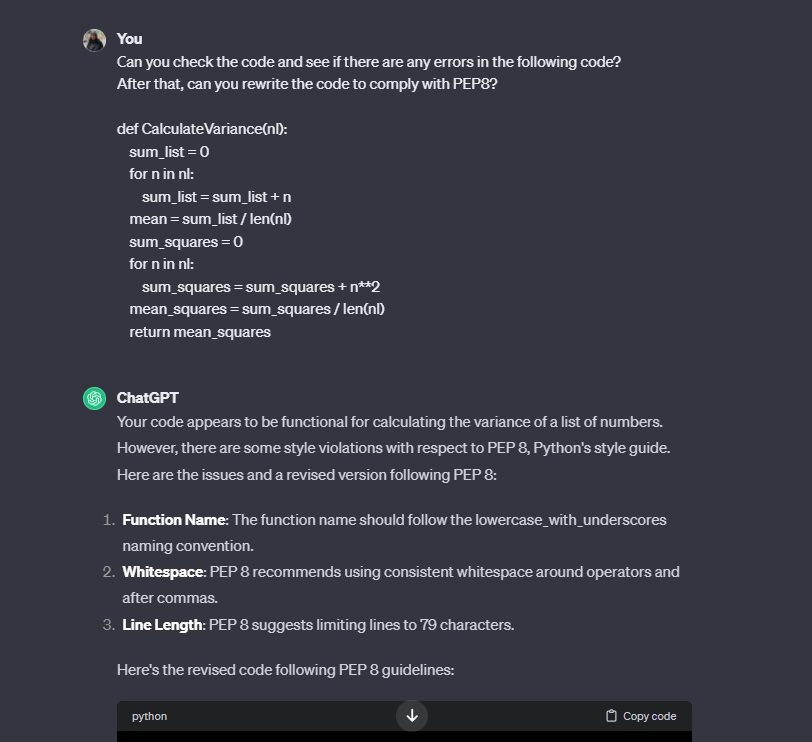

In [43]:
from IPython.display import Image
Image(filename="../PythonForDA/hm7.jpg")


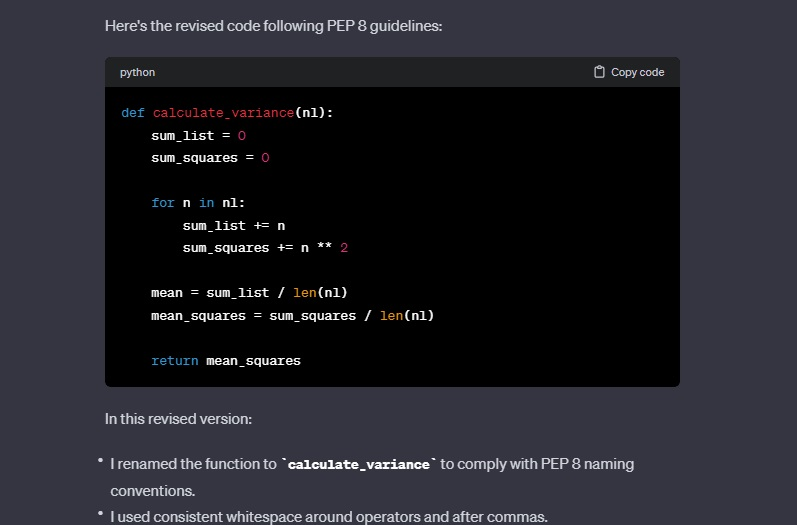

In [44]:
Image(filename="../PythonForDA/2hm7.jpg")

In [41]:
input_list = [75, 80, 85, 90, 95]